<a href="https://colab.research.google.com/github/ruben216/desafio_data_analyst/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução**
*Olá!* 

*Participei de um processo seletivo para uma vaga de Analista de Dados Pleno, e me enviaram os desafios abaixo. Achei legal compartilhar para que outras pessoas possam se preparar ou estudar.*

*Algumas notas:*

1. *Os dados da empresa foram omitidos.*

2. *Desenvolvi localmente, então alguns caminhos de documentos precisam ser adaptados para seu ambiente.*

3. *Os arquivos são muito simples, por isso não vou disponibilizá-los. São eles:*

  *Cadastro: Arquivo simples, com duas abas(UNIDADES e UNIDADES_DISTRIBUIDORAS). Ambas precisam ser importadas.* 
  
  *Unidades_Transacoes: Arquivos com muitas transações, que possuem 4 características que eu chamei de A,B,C e D.*

#### Configurações

In [ ]:
# Módulos auxiliares
import sqlite3 as sql
import pandas as pd
import os as oo
oo.remove("./arquivos/empresa.db") if oo.path.exists("./arquivos/empresa.db") else None

# Configura o pandas para exibir 3 casas decimais
pd.options.display.float_format = "{:,.3f}".format

In [ ]:
# Métodos auxiliares para limpar e criar novamente a base

def create_tables():
    con = sql.connect("./arquivos/empresa.db")
    cur = con.cursor()
    cur.execute('CREATE TABLE UNIDADES_TRANSACOES ( AGENTE TEXT, PONTO_GRUPO TEXT, DATA TEXT, HORA INTEGER, QTDE_TRANSACAO_A NUMERIC, QTDE_TRANSACAO_B NUMERIC, QTDE_TRANSACAO_C NUMERIC, QTDE_TRANSACAO_D NUMERIC, QUALIDADE TEXT, ORIGEM TEXT )')
    cur.execute('CREATE TABLE IF NOT EXISTS UNIDADES (COD TEXT, Unidades TEXT, Ponto_SCDE TEXT)')
    cur.execute('CREATE TABLE IF NOT EXISTS UNIDADES_DISTRIBUIDORAS (codigo TEXT, grupo_economico TEXT, celula_gestor TEXT, fornecedor TEXT, distribuidora TEXT)')
    con.commit()
    cur.close()
    con.close()
    

def clean_tables():
    con = sql.connect("./arquivos/empresa.db")
    cur = con.cursor()
    cur.execute("DELETE FROM UNIDADES_TRANSACOES")
    con.commit()
    cur.close()
    con.close()

def drop_tables():
    con = sql.connect("./arquivos/empresa.db")
    cur = con.cursor()
    cur.execute("drop table UNIDADES_TRANSACOES")
    cur.execute("drop table UNIDADES")
    cur.execute("drop table UNIDADES_DISTRIBUIDORAS")
    cur.execute("drop table UNIDADES_CONSUMO")
    dados = cur.fetchall()
    con.commit()
    cur.close()
    con.close()    
    
    

In [ ]:
#drop_tables()
#create_tables()

## A 

* Crie um banco no SQLite utilizando o python, e salve nesse banco os dados do SCDE e os dados do cadastro. \
Dica: para ler o SCDE no python utilize o encoding = 'unicode_escape'.
* No SQLite, realize join das tabelas de cadastro numa única tabela nova.

In [ ]:
# Solução escolhida: importar o csv em um dataframe, para em seguida inserir no SQL.
# Vantagens: Importação é mais simples, possibilidade de criar uma biblioteca com nomes das colunas e data wrangling simples.

df = pd.read_csv("./arquivos/scde_unidades.csv", encoding = 'unicode-escape', sep = ";", header=3, keep_default_na=False )
unid_cad_2 = pd.read_excel('./arquivos/cadastro.xlsx','UNIDADES_DISTRIBUIDORA')
unid_cad_2

,COD,Grupo Econômico,Célula gestor,Fornecedor,Distribuidora
0,000001-02,GRUPO1,celula.cps01@comerc.com.br ...,Fornecedor3,CPFL PAULISTA
1,000108-15,GRUPO4,celula.cgc01@comerc.com.br ...,Fornecedor1,ENERGISA PARAIBA
2,000108-17,GRUPO4,celula.cgc01@comerc.com.br ...,Fornecedor3,RGE SUL
3,001168-06,GRUPO2,celula.SP02@comerc.com.br ...,Fornecedor3,ENEL SP
4,001168-08,GRUPO2,celula.SP02@comerc.com.br ...,Fornecedor3,ENEL SP
5,031060-04,GRUPO3,celula.rp02@comerc.com.br ...,Fornecedor3,CPFL PAULISTA
6,031060-07,GRUPO3,celula.rp02@comerc.com.br ...,Fornecedor3,CPFL PAULISTA
7,048168-21,GRUPO6,celula.SP04@comerc.com.br ...,Fornecedor2,CPFL PAULISTA
8,048168-24,GRUPO6,celula.SP04@comerc.com.br ...,Fornecedor2,CPFL PAULISTA
9,097181-01,GRUPO5,celula.bg01@comerc.com.br ...,Fornecedor3,EDP SÃO PAULO


In [1]:
# Dict com o DE/PARA dos nomes das colunas
config_colunas = {'Agente': 'agente',
                 'Ponto / Grupo' : 'ponto_grupo',
                 'Data' : 'data',
                 'Hora': 'hora',
                 'Qtde Transação A' : 'QTDE_TRANSACAO_A',
                 'Qtde Transação B' : 'QTDE_TRANSACAO_B',
                 'Qtde Transação C' : 'QTDE_TRANSACAO_C',
                  'Qtde Transação D' : 'QTDE_TRANSACAO_D',
                  'Qualidade' : 'qualidade',
                  'Origem' : 'origem'
                 }

In [ ]:
# Renomear as colunas usando config_colunas
df.rename(columns = config_colunas, inplace=True)
df

,agente,ponto_grupo,data,hora,ativa_c_kwh,ativa_g_kwh,reativa_c_kvarh,reativa_g_kvarh,qualidade,origem
0,-,SPAJIVENTR-01 (L),01/11/2021,1,"4.958,80",0,"1.324,40",0,Completo,COLETA DIÁRIA
1,-,SPAJIVENTR-01 (L),01/11/2021,2,"4.720,80",0,"1.190,00",0,Completo,COLETA DIÁRIA
2,-,SPAJIVENTR-01 (L),01/11/2021,3,"4.597,60",0,"1.111,60",0,Completo,COLETA DIÁRIA
3,-,SPAJIVENTR-01 (L),01/11/2021,4,"4.986,80",0,"1.338,40",0,Completo,COLETA DIÁRIA
4,-,SPAJIVENTR-01 (L),01/11/2021,5,"5.336,80",0,"1.526,00",0,Completo,COLETA DIÁRIA
...,...,...,...,...,...,...,...,...,...,...
20875,-,SPTDPIENTR101 (L),26/01/2022,20,,,,,Faltante,DADOS FALTANTES
20876,-,SPTDPIENTR101 (L),26/01/2022,21,,,,,Faltante,DADOS FALTANTES
20877,-,SPTDPIENTR101 (L),26/01/2022,22,,,,,Faltante,DADOS FALTANTES
20878,-,SPTDPIENTR101 (L),26/01/2022,23,,,,,Faltante,DADOS FALTANTES


In [ ]:
# Carregando os dados no DB
con = sql.connect("./arquivos/empresa.db")
df.to_sql('UNIDADES_TRANSACOES',con,if_exists='replace', index=False)
con.commit()
con.close()

In [ ]:
# Dataframe com dados dos cadastros das Unidades
df_2 = pd.read_excel('./arquivos/cadastro.xlsx')
df_2

,COD,Unidades,Ponto_SCDE
0,000001-02,Unidade1,SPAJIVENTR-01 (L)
1,031060-07,Unidade2,SPFRP2ENTR101 (L)
2,031060-04,Unidade3,SPFRP1ENTR101 (L)
3,001168-06,Unidade4,SPHAEBENTR101 (L)
4,001168-08,Unidade5,SPHAVMENTR101 (L)
5,000108-15,Unidade6,PBITCPENTR101 (L)
6,000108-17,Unidade7,RSCMB1ENTR101 (L)
7,097181-01,Unidade8,SPSHTTALADM04 (L)
8,048168-21,Unidade9,SPTDPIENTR101 (L)
9,048168-24,Unidade10,SPTDRPENTR101 (L)


In [ ]:
# Inserindo os dados das unidades
con = sql.connect("./arquivos/empresa.db")
df_2.to_sql('UNIDADES',con,if_exists='replace', index=False)
con.commit()
con.close()


In [ ]:
# Inserindo os dados das distribuidoras

con = sql.connect("./arquivos/empresa.db")
unid_cad_2.to_sql('UNIDADES_DISTRIBUIDORAS',con,if_exists='replace', index=False)
con.commit()
con.close()


C:\Users\ruben.valenzuela\Anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [ ]:
# Renomeia as colunas da tabela

config_colunas_distr = {'COD': 'codigo',
                 'Grupo Econômico' : 'grupo_economico',
                 'Célula gestor' : 'celula_gestor',
                 'Fornecedor': 'fornecedor',
                 'Distribuidora' : 'distribuidora'
                 }

unid_cad_2.rename(columns = config_colunas_distr, inplace=True)

unid_cad_2

,codigo,grupo_economico,celula_gestor,fornecedor,distribuidora
0,000001-02,GRUPO1,celula.cps01@comerc.com.br ...,Fornecedor3,CPFL PAULISTA
1,000108-15,GRUPO4,celula.cgc01@comerc.com.br ...,Fornecedor1,ENERGISA PARAIBA
2,000108-17,GRUPO4,celula.cgc01@comerc.com.br ...,Fornecedor3,RGE SUL
3,001168-06,GRUPO2,celula.SP02@comerc.com.br ...,Fornecedor3,ENEL SP
4,001168-08,GRUPO2,celula.SP02@comerc.com.br ...,Fornecedor3,ENEL SP
5,031060-04,GRUPO3,celula.rp02@comerc.com.br ...,Fornecedor3,CPFL PAULISTA
6,031060-07,GRUPO3,celula.rp02@comerc.com.br ...,Fornecedor3,CPFL PAULISTA
7,048168-21,GRUPO6,celula.SP04@comerc.com.br ...,Fornecedor2,CPFL PAULISTA
8,048168-24,GRUPO6,celula.SP04@comerc.com.br ...,Fornecedor2,CPFL PAULISTA
9,097181-01,GRUPO5,celula.bg01@comerc.com.br ...,Fornecedor3,EDP SÃO PAULO


SQL que gera tabela única

*CREATE TABLE UNIDADES_CONSUMO AS \
    SELECT * FROM \
    UNIDADES_TRANSACOES SUC JOIN
    Unidades UN ON
    SUC.ponto_grupo = UN.Ponto_SCDE*

## B

    Utilizando o python, calcule para cada mês de cada unidade:
    1) total de transações, por tipo e por unidade
    2) média de transações por dia da semana
    3) quantidade de transações zeradas
    4) quantidade de horas faltantes
    5) data com maior e menor valores



In [ ]:
# 1) total de consumo em MWh \

# Com panda, iremos ler a tabela que uniu as informações

con = sql.connect("./arquivos/empresa.db")
transacoes_unid = pd.read_sql_query('SELECT * FROM UNIDADES_CONSUMO',con,parse_dates=['data'],coerce_float = True)
con.commit()
con.close()



transacoes_unid

#Atenção! executar os comandos abaixo para  substituir os espaços vazios #

#UPDATE UNIDADES_CONSUMO set QTDE_TRANSACAO_A = 0,  QTDE_TRANSACAO_B = 0 , QTDE_TRANSACAO_C = 0 , QTDE_TRANSACAO_D = 0
#WHERE QTDE_TRANSACAO_A = '' and QTDE_TRANSACAO_B = '' and QTDE_TRANSACAO_C = '' and QTDE_TRANSACAO_D = ''

,agente,ponto_grupo,data,hora,ativa_c_kwh,ativa_g_kwh,reativa_c_kvarh,reativa_g_kvarh,qualidade,origem,COD,Unidades,Ponto_SCDE
0,-,SPAJIVENTR-01 (L),2021-01-11,1,"4.958,80",0,"1.324,40",0,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
1,-,SPAJIVENTR-01 (L),2021-01-11,2,"4.720,80",0,"1.190,00",0,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
2,-,SPAJIVENTR-01 (L),2021-01-11,3,"4.597,60",0,"1.111,60",0,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
3,-,SPAJIVENTR-01 (L),2021-01-11,4,"4.986,80",0,"1.338,40",0,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
4,-,SPAJIVENTR-01 (L),2021-01-11,5,"5.336,80",0,"1.526,00",0,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,-,SPTDPIENTR101 (L),2022-01-26,20,0,0,0,0,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20876,-,SPTDPIENTR101 (L),2022-01-26,21,0,0,0,0,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20877,-,SPTDPIENTR101 (L),2022-01-26,22,0,0,0,0,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20878,-,SPTDPIENTR101 (L),2022-01-26,23,0,0,0,0,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)


In [ ]:
# Ajustes QTDE_TRANSACAO_A
transacoes_unid['QTDE_TRANSACAO_A'] = transacoes_unid['QTDE_TRANSACAO_A'].str.replace('.','')
transacoes_unid['QTDE_TRANSACAO_A'] = transacoes_unid['QTDE_TRANSACAO_A'].str.replace(',','.')
transacoes_unid['QTDE_TRANSACAO_A'] = transacoes_unid['QTDE_TRANSACAO_A'].astype(float)

# Ajustes QTDE_TRANSACAO_B
transacoes_unid['QTDE_TRANSACAO_B'] = transacoes_unid['QTDE_TRANSACAO_B'].str.replace('.','')
transacoes_unid['QTDE_TRANSACAO_B'] = transacoes_unid['QTDE_TRANSACAO_B'].str.replace(',','.')
transacoes_unid['QTDE_TRANSACAO_B'] = transacoes_unid['QTDE_TRANSACAO_B'].astype(float)
transacoes_unid

# Ajustes QTDE_TRANSACAO_C
transacoes_unid['QTDE_TRANSACAO_C'] = transacoes_unid['QTDE_TRANSACAO_C'].str.replace('.','')
transacoes_unid['QTDE_TRANSACAO_C'] = transacoes_unid['QTDE_TRANSACAO_C'].str.replace(',','.')
transacoes_unid['QTDE_TRANSACAO_C'] = transacoes_unid['QTDE_TRANSACAO_C'].astype(float)
transacoes_unid

# Ajustes QTDE_TRANSACAO_D
transacoes_unid['QTDE_TRANSACAO_D'] = transacoes_unid['QTDE_TRANSACAO_D'].str.replace('.','')
transacoes_unid['QTDE_TRANSACAO_D'] = transacoes_unid['QTDE_TRANSACAO_D'].str.replace(',','.')
transacoes_unid['QTDE_TRANSACAO_D'] = transacoes_unid['QTDE_TRANSACAO_D'].astype(float)

In [ ]:
transacoes_unid

,agente,ponto_grupo,data,hora,ativa_c_kwh,ativa_g_kwh,reativa_c_kvarh,reativa_g_kvarh,qualidade,origem,COD,Unidades,Ponto_SCDE
0,-,SPAJIVENTR-01 (L),2021-01-11,1,"4,958.800",0.000,"1,324.400",0.000,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
1,-,SPAJIVENTR-01 (L),2021-01-11,2,"4,720.800",0.000,"1,190.000",0.000,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
2,-,SPAJIVENTR-01 (L),2021-01-11,3,"4,597.600",0.000,"1,111.600",0.000,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
3,-,SPAJIVENTR-01 (L),2021-01-11,4,"4,986.800",0.000,"1,338.400",0.000,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
4,-,SPAJIVENTR-01 (L),2021-01-11,5,"5,336.800",0.000,"1,526.000",0.000,Completo,COLETA DIÁRIA,000001-02,Unidade1,SPAJIVENTR-01 (L)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,-,SPTDPIENTR101 (L),2022-01-26,20,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20876,-,SPTDPIENTR101 (L),2022-01-26,21,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20877,-,SPTDPIENTR101 (L),2022-01-26,22,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20878,-,SPTDPIENTR101 (L),2022-01-26,23,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)


In [ ]:
#Consumo_por_unid

#Converter de grandeza K para M
transacoes_unid['QTDE_TRANSACAO_A'] = transacoes_unid['QTDE_TRANSACAO_A'].apply(lambda x:x/1000)
transacoes_unid['QTDE_TRANSACAO_B'] = transacoes_unid['QTDE_TRANSACAO_B'].apply(lambda x:x/1000)
transacoes_unid['QTDE_TRANSACAO_C'] = transacoes_unid['QTDE_TRANSACAO_C'].apply(lambda x:x/1000)
transacoes_unid['QTDE_TRANSACAO_D'] = transacoes_unid['QTDE_TRANSACAO_D'].apply(lambda x:x/1000)

In [ ]:
#Renomear as colunas para não confundir o usuário
config_unid_cons = {
    'QTDE_TRANSACAO_A' : 'QTDE_TRANSACAO_A',
    'QTDE_TRANSACAO_B' : 'QTDE_TRANSACAO_B',
    'QTDE_TRANSACAO_C' : 'QTDE_TRANSACAO_C',
    'QTDE_TRANSACAO_D' : 'QTDE_TRANSACAO_D',
}

transacoes_unid.rename(columns=config_unid_cons,
          inplace=True)

In [ ]:
# 1) total de consumo em MWh 
transacoes_unid.groupby('Unidades').sum()


,hora,ativa_c_mwh,ativa_g_mwh,reativa_c_mvarh,reativa_g_mvarh
Unidades,,,,,
Unidade1,26100,"9,176.390",0.000,"2,475.065",0.000
Unidade10,26100,546.936,0.000,327.905,0.000
Unidade2,26100,"1,140.936",0.000,405.078,1.839
Unidade3,26100,930.406,0.000,321.491,0.041
Unidade4,26100,338.285,0.000,26.027,0.575
Unidade5,26100,317.495,0.000,99.412,0.000
Unidade6,26100,120.185,0.000,21.976,8.349
Unidade7,26100,"6,231.954",0.000,"1,946.013",209.528
Unidade8,26100,554.282,0.000,91.441,3.129


In [ ]:
# 2) média de consumo em MWh por dia da semana. (Se for por grupo de dias, basta alterar o freq)
# Update: Deverá ser retornado o dia da semana.

#To-Do: Corrigir a tradução do dia, pode ser um dict com os nomes em inglês

from datetime import datetime


transacoes_unid_p_dia = transacoes_unid.groupby(['Unidades',pd.Grouper(key='data',freq='D')]).agg({'QTDE_TRANSACAO_A':'sum','QTDE_TRANSACAO_B': 'sum','QTDE_TRANSACAO_C': 'sum','QTDE_TRANSACAO_D': 'sum'}).reset_index()


transacoes_unid_p_dia['Dia_Semana'] = transacoes_unid_p_dia['data'].dt.day_name()

transacoes_unid_p_dia


,Unidades,data,ativa_c_mwh,ativa_g_mwh,reativa_c_mvarh,reativa_g_mvarh,Dia_Semana
0,Unidade1,2021-01-11,93.094,0.000,23.643,0.000,Monday
1,Unidade1,2021-01-12,110.090,0.000,28.484,0.000,Tuesday
2,Unidade1,2021-02-11,89.961,0.000,23.405,0.000,Thursday
3,Unidade1,2021-02-12,118.628,0.000,29.994,0.000,Friday
4,Unidade1,2021-03-11,104.644,0.000,27.569,0.000,Thursday
...,...,...,...,...,...,...,...
865,Unidade9,2022-08-01,6.299,0.000,2.990,0.000,Monday
866,Unidade9,2022-09-01,5.754,0.000,2.773,0.000,Thursday
867,Unidade9,2022-10-01,5.850,0.000,2.854,0.000,Saturday
868,Unidade9,2022-11-01,6.205,0.000,2.923,0.000,Tuesday


In [ ]:
# 3) quantidade de horas zeradas \
# Solução mais rápida. Buscar uma melhor, que não precise criar um DF secundário.
# To-do: Incluir dados da(s) unidade(s) que possuem count == 0

cont_hora_zerada = transacoes_unid.query('QTDE_TRANSACAO_A == "0"').groupby('Unidades').count()
cont_hora_zerada['agente']

Unidades
Unidade10     24
Unidade2      28
Unidade3      24
Unidade4      21
Unidade5       7
Unidade6      29
Unidade7     143
Unidade9      24
Name: agente, dtype: int64

In [ ]:
# 4) quantidade de horas faltantes \

cont_dados_falt = transacoes_unid.query('origem == "DADOS FALTANTES"').groupby('Unidades').count()
cont_dados_falt['agente']


Unidades
Unidade10     24
Unidade2      24
Unidade3      24
Unidade6      24
Unidade7     143
Unidade9      24
Name: agente, dtype: int64

In [ ]:
# 5) data com maior e menor consumo 
# Duas soluções, uma criando um subset e outra utilizando query
# Maior consumo
transacoes_unid[transacoes_unid.ativa_c_mwh ==  transacoes_unid.ativa_c_mwh.max()]

# Menor consumo
# To-do : realizar tratamento para excluir dados zerados
#transacoes_unid[transacoes_unid.ativa_c_mwh ==  transacoes_unid.ativa_c_mwh.min()]
transacoes_unid.query('QTDE_TRANSACAO_A == QTDE_TRANSACAO_A.min()')

,agente,ponto_grupo,data,hora,ativa_c_mwh,ativa_g_mwh,reativa_c_mvarh,reativa_g_mvarh,qualidade,origem,COD,Unidades,Ponto_SCDE
4152,-,SPFRP1ENTR101 (L),2022-01-26,1,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,031060-04,Unidade3,SPFRP1ENTR101 (L)
4153,-,SPFRP1ENTR101 (L),2022-01-26,2,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,031060-04,Unidade3,SPFRP1ENTR101 (L)
4154,-,SPFRP1ENTR101 (L),2022-01-26,3,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,031060-04,Unidade3,SPFRP1ENTR101 (L)
4155,-,SPFRP1ENTR101 (L),2022-01-26,4,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,031060-04,Unidade3,SPFRP1ENTR101 (L)
4156,-,SPFRP1ENTR101 (L),2022-01-26,5,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,031060-04,Unidade3,SPFRP1ENTR101 (L)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,-,SPTDPIENTR101 (L),2022-01-26,20,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20876,-,SPTDPIENTR101 (L),2022-01-26,21,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20877,-,SPTDPIENTR101 (L),2022-01-26,22,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)
20878,-,SPTDPIENTR101 (L),2022-01-26,23,0.000,0.000,0.000,0.000,Faltante,DADOS FALTANTES,048168-21,Unidade9,SPTDPIENTR101 (L)


## C
* No SQlite, crie uma view para o mês de janeiro com os seguintes dados para cada unidade: \
1) total de consumo em MWh \
2) quantidade de horas zeradas \
3) quantidade de horas faltantes \
4) MWm

CREATE VIEW RESUMO_DADOS AS
SELECT A.UNIDADE,
       A.VALOR AS TOTAL_CONSUMIDO,
       CASE
           WHEN B.VALOR IS NULL THEN '0'
           ELSE B.VALOR
       END AS TOTAL_ZERADO,
       CASE
           WHEN C.VALOR IS NULL THEN '0'
           ELSE C.VALOR
       END AS 'DADOS FALTANTES'
FROM
  (SELECT Unidades AS UNIDADE,
          SUM(QTDE_TRANSACAO_A)/1000 AS VALOR
   FROM UNIDADES_CONSUMO
   GROUP BY UNIDADES) AS A
LEFT JOIN
  (SELECT Unidades AS UNIDADE,
          COUNT(*) AS VALOR
   FROM UNIDADES_CONSUMO
   WHERE QTDE_TRANSACAO_A = 0
   GROUP BY UNIDADES) AS B ON A.UNIDADE = B.UNIDADE
LEFT JOIN
  (SELECT Unidades AS UNIDADE,
          count(*) AS 'VALOR'
   FROM UNIDADES_CONSUMO
   WHERE ORIGEM = 'DADOS FALTANTES'
   GROUP BY unidades) AS C ON A.UNIDADE = C.UNIDADE

## D

* No SQlite, utilize a view de unidades para apresentar os dados abaixo para cada distribuidora: \
1) total de transações do tipo A \
2) total de transações do tipo B \
3) quantidade de transações zeradas \
4) quantidade de transações com dados faltantes \



1) total de unidades na distribuidora

SELECT distribuidora,count(*) AS total
FROM UNIDADES_DISTRIBUIDORAS 
GROUP BY distribuidora

2) total de consumo em MWh

3) quantidade de horas zeradas

4) quantidade de horas faltantes

5) MWm

select UD.distribuidora,* FROM RESUMO_DADOS RD
JOIN Unidades UN 
	ON RD.UNIDADE = UN.Unidades
JOIN UNIDADES_DISTRIBUIDORAS UD
	ON UN.COD = UD.codigo

## E
* No Jupyter Notebook, crie os seguintes gráficos: \
1) gráfico de linha com o consumo de uma unidade para cada mês (3 gráficos) \
2) gráfico de barra com a quantidade de unidades por fornecedor \
3) gráfico de barra com a quantidade de unidades por célula \


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='data'>

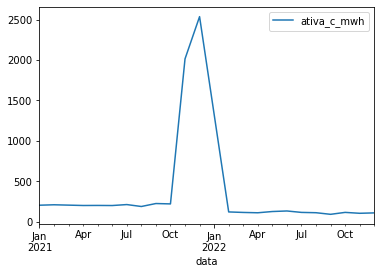

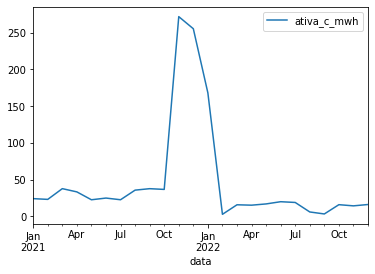

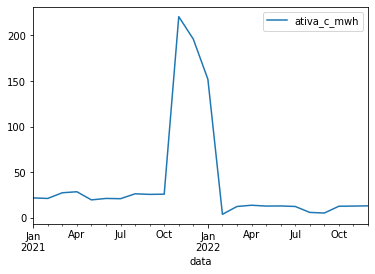

In [ ]:
#1) gráfico de linha com o consumo de uma unidade para cada mês (3 gráficos) 
# Realiza agrupamento para Unidade1 por mês
# Dúvida: 3 gráficos seriam referentes a 3 unidades?
#         Consumo seria referente ao campo ativa_c_mwh?

transacoes_unid_p_mes_1 = transacoes_unid.query('Unidades == "Unidade1"').groupby(['Unidades',pd.Grouper(key='data',freq='M')]).agg({'ativa_c_mwh':'sum'}).reset_index()
transacoes_unid_p_mes_2 = transacoes_unid.query('Unidades == "Unidade2"').groupby(['Unidades',pd.Grouper(key='data',freq='M')]).agg({'ativa_c_mwh':'sum'}).reset_index()
transacoes_unid_p_mes_3 = transacoes_unid.query('Unidades == "Unidade3"').groupby(['Unidades',pd.Grouper(key='data',freq='M')]).agg({'ativa_c_mwh':'sum'}).reset_index()



transacoes_unid_p_mes_1.plot(x='data',y='ativa_c_mwh',kind='line')
transacoes_unid_p_mes_2.plot(x='data',y='ativa_c_mwh',kind='line')
transacoes_unid_p_mes_3.plot(x='data',y='ativa_c_mwh',kind='line')

<AxesSubplot:xlabel='fornecedor'>

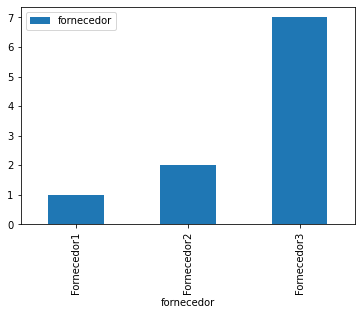

In [ ]:
#2) gráfico de barra com a quantidade de unidades por fornecedor 

#unid_cad_2.groupby('fornecedor').count()
plt_for_unid = unid_cad_2.groupby('fornecedor').agg({'fornecedor':'count'})


plt_for_unid.plot(kind='bar')


<AxesSubplot:xlabel='celula_gestor'>

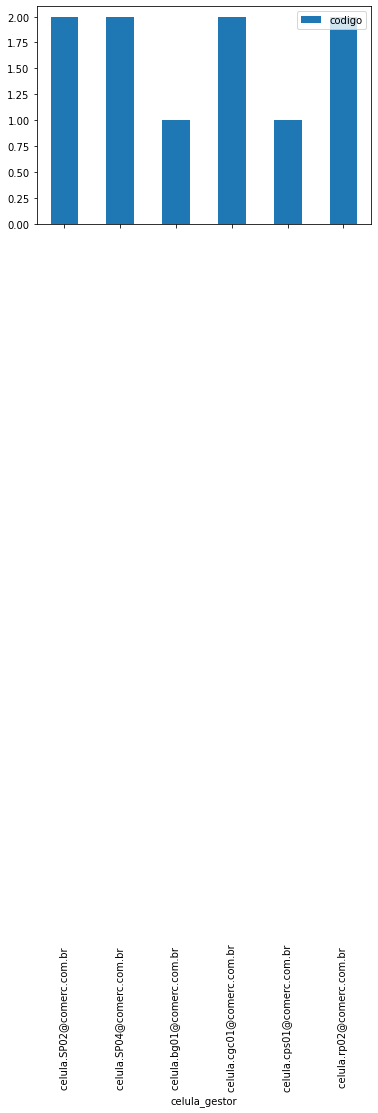

In [ ]:
# 3) gráfico de barra com a quantidade de unidades por célula \
#To-Do: Remover espaço nas colunas(ltrim/rtrim)

plt_unid_cel = unid_cad_2.groupby('celula_gestor').agg({'codigo':'count'})

plt_unid_cel.plot(kind='bar')

## F
* No Power BI, crie gráficos: \
1) Com informações sobre o consumo das unidades \



2) Com agrupamentos utilizando os atributos dos dados cadastrais \



3) Crie alguma outra visualização com quaisquer dados do seu interesse.



